# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[grid_params],
        shape_gene_pool=[
            ray_params,     
            double_parabolic_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitn

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

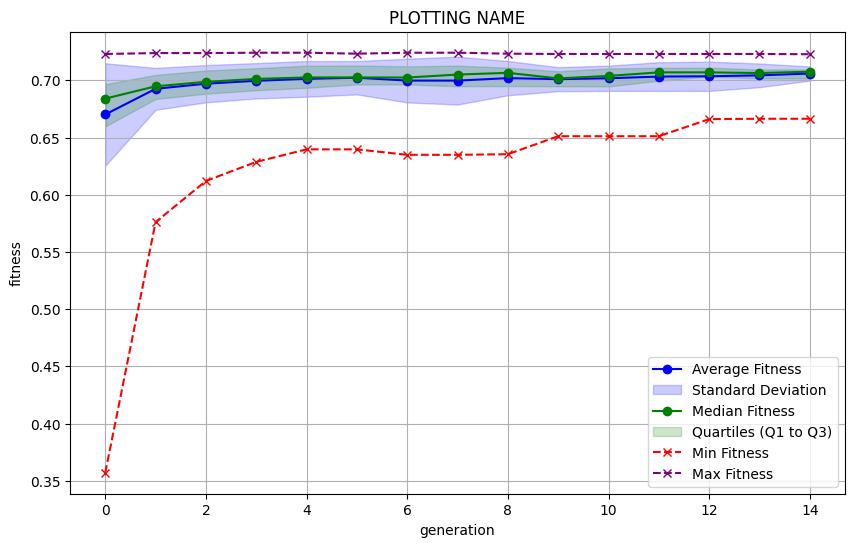

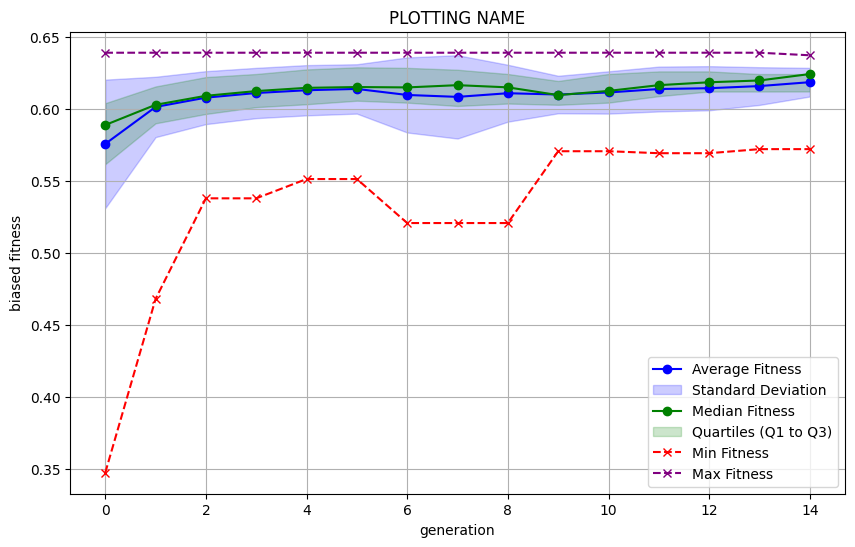

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_470: ['TriangleShape_126', 'GridStrictTransformation_470']
predict: (0.2888416946194283, 373.2638143000001, 456.44618909999986)
biased_fitness: 0.6270048256280032, fitness: 0.713033036805717
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


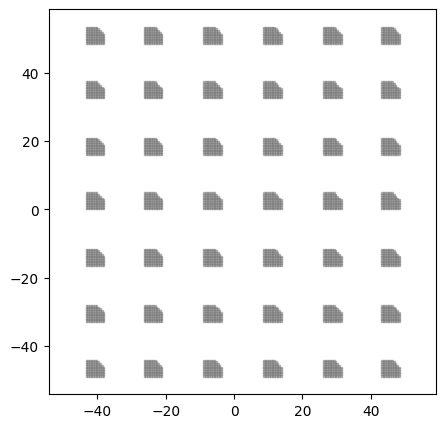

--------------------------------------------------
label: VentHole Chromosome_95: ['RayShape_495', 'GridStrictTransformation_470']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


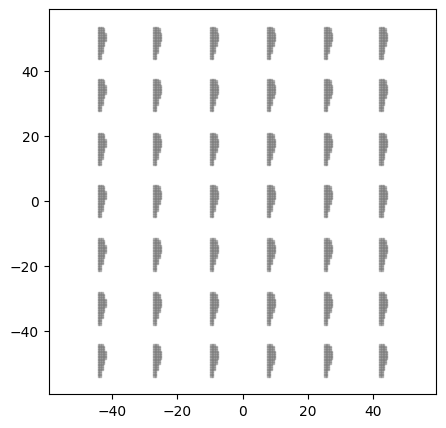

--------------------------------------------------
label: VentHole Chromosome_470: ['TriangleShape_95', 'GridStrictTransformation_247']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


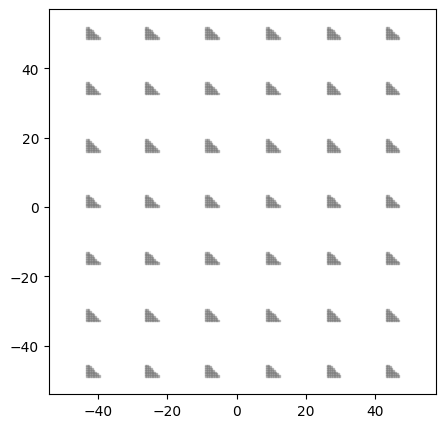

--------------------------------------------------
label: VentHole Chromosome_164: ['TriangleShape_470', 'GridStrictTransformation_495']
predict: (0.28970960434629456, 372.91252109999994, 457.52320869999994)
biased_fitness: 0.6144565162518765, fitness: 0.700725307537055
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 4.118785609112858, dy: 6.30555299431033, ]


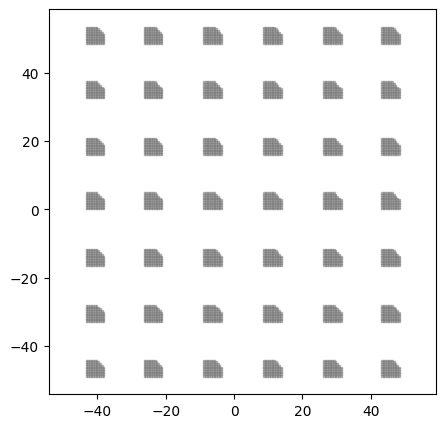

--------------------------------------------------
label: VentHole Chromosome_278: ['TriangleShape_470', 'GridStrictTransformation_95']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 9.886476273953427, ]


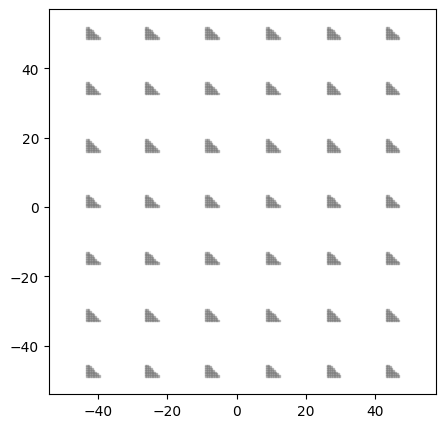

--------------------------------------------------
label: VentHole Chromosome_111: ['TriangleShape_278', 'GridStrictTransformation_164']
predict: (0.2888416946194283, 373.2638143000001, 456.44618909999986)
biased_fitness: 0.6270048256280032, fitness: 0.713033036805717
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 4.118785609112858, dy: 6.30555299431033, ]


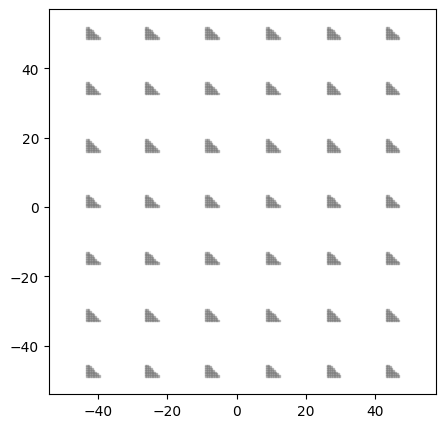

--------------------------------------------------
label: VentHole Chromosome_269: ['TriangleShape_472', 'GridStrictTransformation_95']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


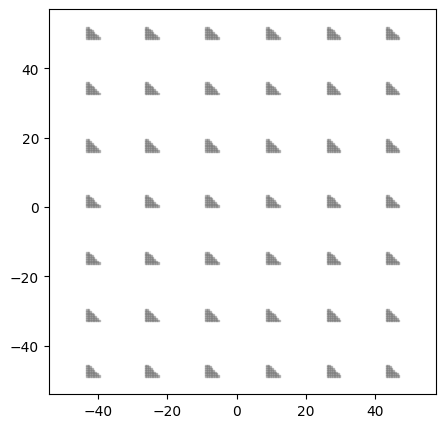

--------------------------------------------------
label: VentHole Chromosome_278: ['TriangleShape_164', 'GridStrictTransformation_278']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 9.886476273953427, ]


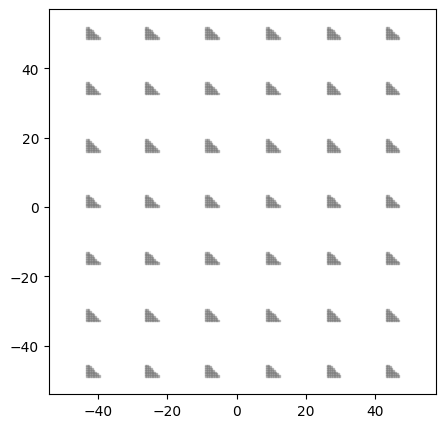

--------------------------------------------------
label: VentHole Chromosome_222: ['RayShape_114', 'GridStrictTransformation_278']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


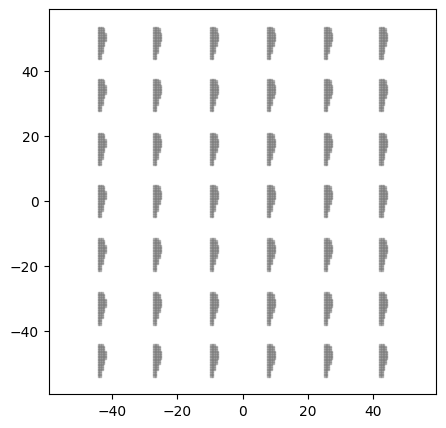

--------------------------------------------------
label: VentHole Chromosome_231: ['RayShape_95', 'GridStrictTransformation_470']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


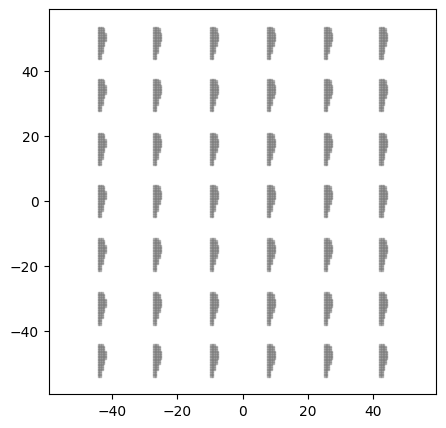

--------------------------------------------------
label: VentHole Chromosome_466: ['TriangleShape_466', 'GridStrictTransformation_391']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


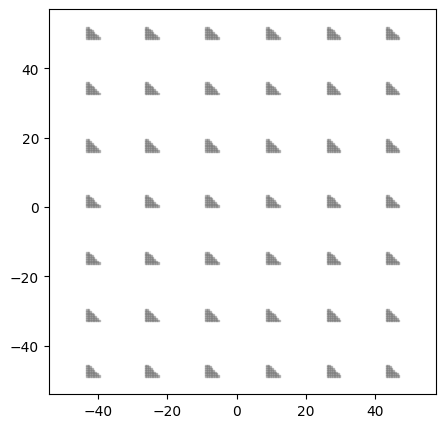

--------------------------------------------------
label: VentHole Chromosome_183: ['TriangleShape_231', 'GridStrictTransformation_147']
predict: (0.29087235836423053, 372.6051840999999, 456.03134680000005)
biased_fitness: 0.6026983688007727, fitness: 0.6980937618576947
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


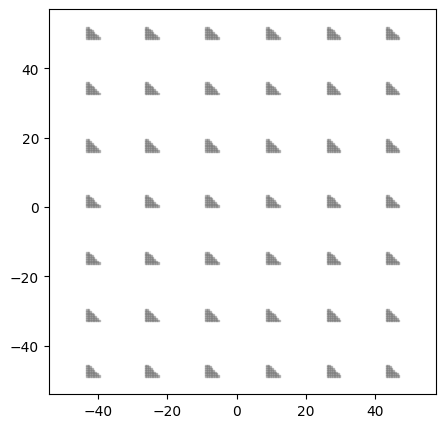

--------------------------------------------------
label: VentHole Chromosome_281: ['TriangleShape_470', 'GridStrictTransformation_466']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


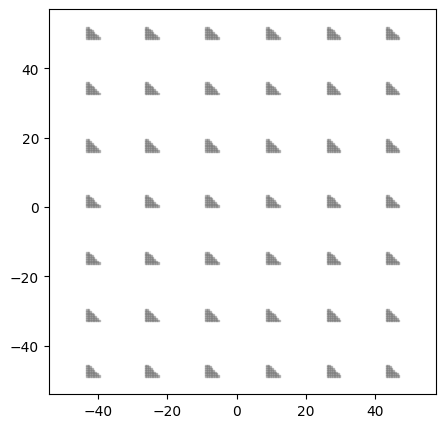

--------------------------------------------------
label: VentHole Chromosome_95: ['TriangleShape_231', 'GridStrictTransformation_43']
predict: (0.2903858441048359, 372.7217431, 456.2004454999999)
biased_fitness: 0.608588576032297, fitness: 0.701530615951641
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


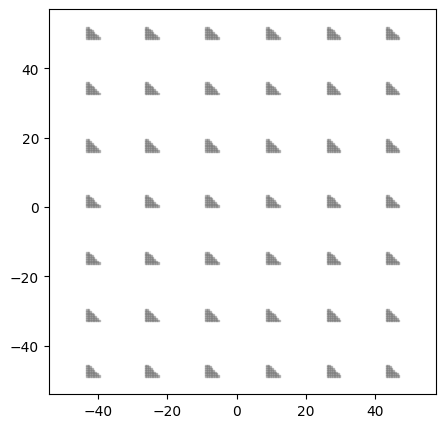

--------------------------------------------------
label: VentHole Chromosome_247: ['TriangleShape_111', 'GridStrictTransformation_247']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


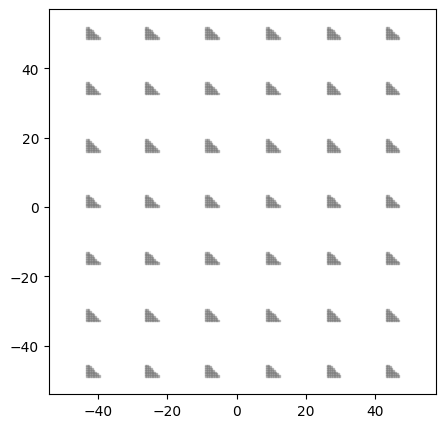

--------------------------------------------------
label: VentHole Chromosome_470: ['RayShape_45', 'GridStrictTransformation_281']
predict: (0.29095116944795674, 372.67247299999997, 456.1509998999999)
biased_fitness: 0.601019262928606, fitness: 0.6963709410204333
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


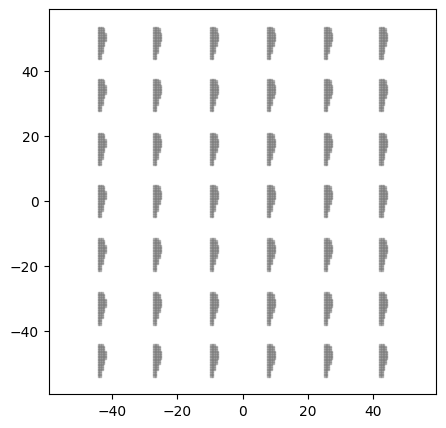

--------------------------------------------------
label: VentHole Chromosome_231: ['RayShape_45', 'GridStrictTransformation_466']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


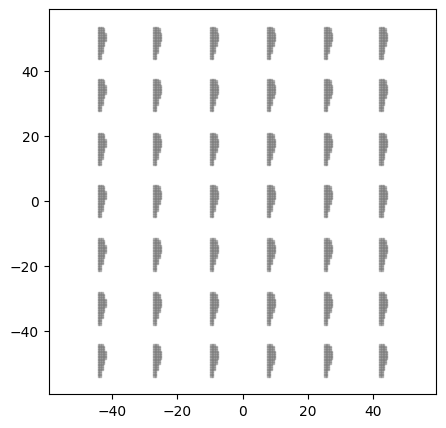

--------------------------------------------------
label: VentHole Chromosome_470: ['RayShape_470', 'GridStrictTransformation_95']
predict: (0.28836102237295247, 372.82729779999994, 455.8880335)
biased_fitness: 0.6370331307786655, fitness: 0.7228131197704755
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 4.118785609112858, dy: 6.30555299431033, ]


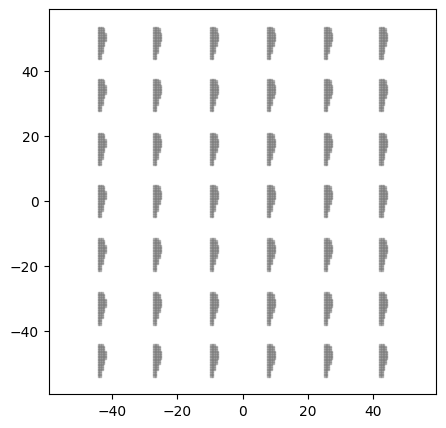

--------------------------------------------------
label: VentHole Chromosome_470: ['RayShape_470', 'GridStrictTransformation_470']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 9.886476273953427, ]


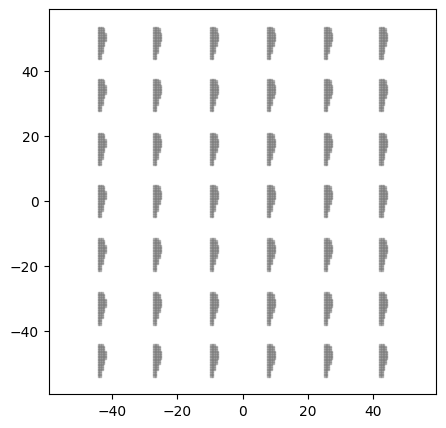

--------------------------------------------------
label: VentHole Chromosome_111: ['TriangleShape_222', 'GridStrictTransformation_45']
predict: (0.2888416946194283, 373.2638143000001, 456.44618909999986)
biased_fitness: 0.6270048256280032, fitness: 0.713033036805717
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


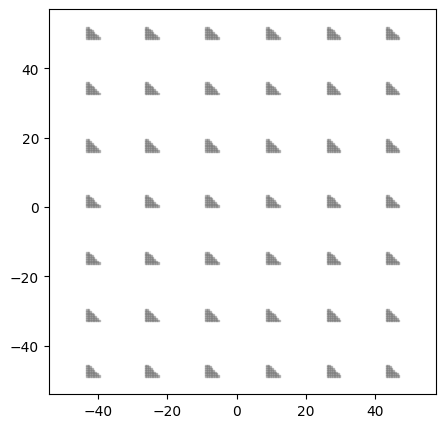

--------------------------------------------------
label: VentHole Chromosome_164: ['RayShape_43', 'GridStrictTransformation_114']
predict: (0.29045653038105357, 372.90467789999974, 456.91486039999995)
biased_fitness: 0.6052554643652512, fitness: 0.6963370046894657
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 6.865383149454428, dy: 6.30555299431033, ]


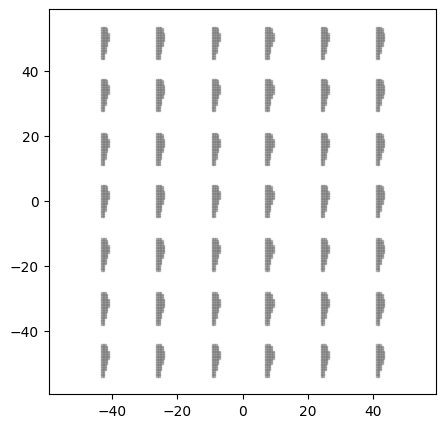

--------------------------------------------------
label: VentHole Chromosome_470: ['RayShape_231', 'GridStrictTransformation_470']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 4.118785609112858, dy: 6.30555299431033, ]


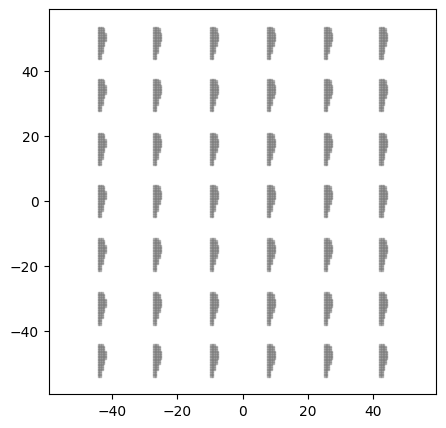

--------------------------------------------------
label: VentHole Chromosome_126: ['TriangleShape_164', 'GridStrictTransformation_126']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


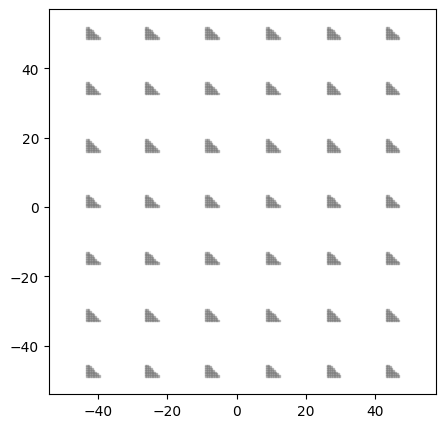

--------------------------------------------------
label: VentHole Chromosome_278: ['RayShape_231', 'GridStrictTransformation_95']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 9.886476273953427, ]


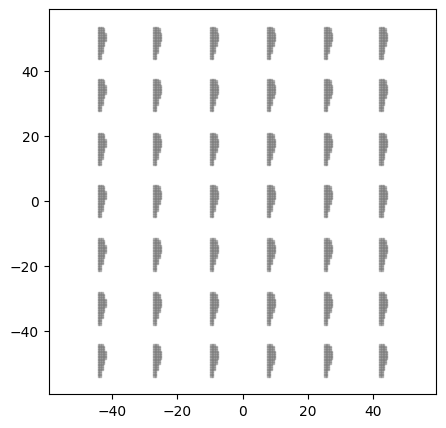

--------------------------------------------------
label: VentHole Chromosome_470: ['RayShape_126', 'GridStrictTransformation_416']
predict: (0.2908102826544532, 372.99272879999995, 455.6648523999998)
biased_fitness: 0.6023626940376557, fitness: 0.6986092674554691
shape parameter:
parameter_list: [ upper_slope: 2.8193774348236778, nose_point: 2.119341578761634, lower_coefficient: 1.024017048743131, lower_x-intercept: 1.7388875858408364, lower_y-intercept: 1.9784231671298964, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


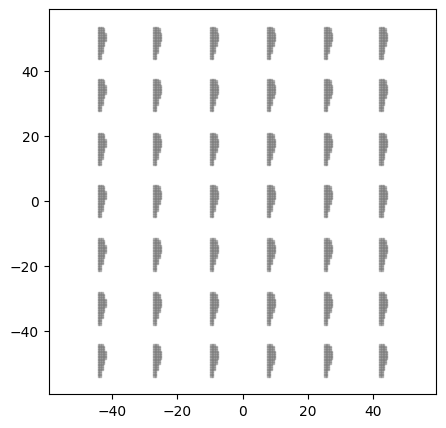

--------------------------------------------------
label: VentHole Chromosome_222: ['TriangleShape_231', 'GridStrictTransformation_164']
predict: (0.29014704084246423, 373.1378145000001, 455.17790329999974)
biased_fitness: 0.6118965491055006, fitness: 0.7069510025753584
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 6.865383149454428, dy: 6.30555299431033, ]


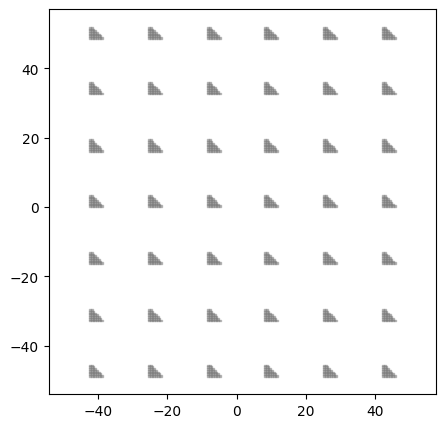

--------------------------------------------------
label: VentHole Chromosome_164: ['TriangleShape_77', 'GridStrictTransformation_222']
predict: (0.28916216703969866, 373.10824489999993, 456.9603344999999)
biased_fitness: 0.6222677679442192, fitness: 0.7080354326030143
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 6.865383149454428, dy: 6.30555299431033, ]


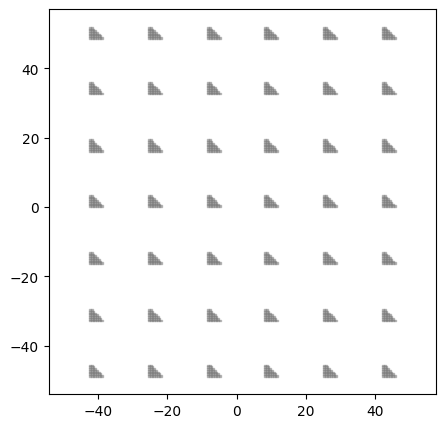

--------------------------------------------------
label: VentHole Chromosome_95: ['TriangleShape_164', 'GridStrictTransformation_278']
predict: (0.2889104982556725, 373.2966043999999, 457.3731488999998)
biased_fitness: 0.6240237046205857, fitness: 0.7075462509432762
shape parameter:
parameter_list: [ l: 9.049285258558857, ]
pattern parameter:
parameter_list: [ dx: 7.357341086278963, dy: 6.30555299431033, ]


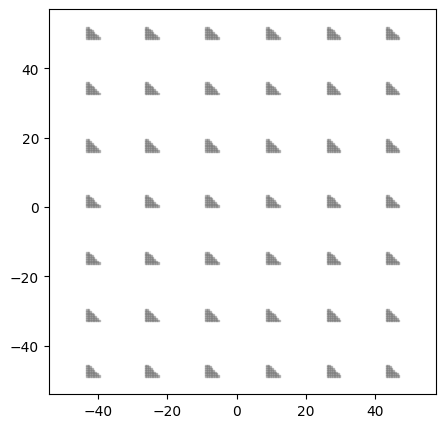

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )